In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\Titanic_train.csv")
test_df=pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\Titanic_test.csv")

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

In [7]:
numerical_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

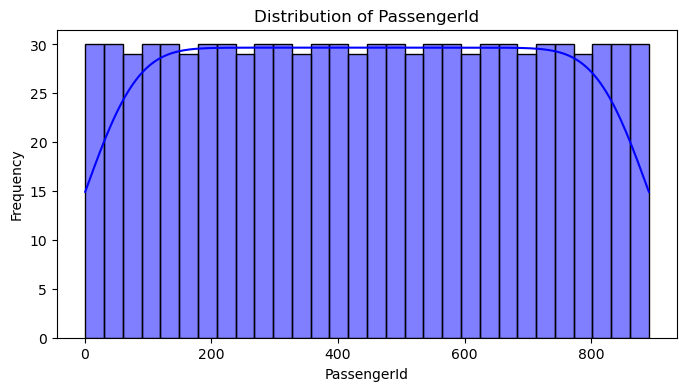

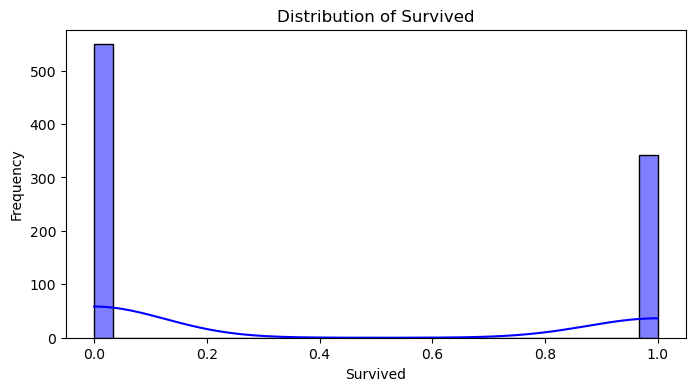

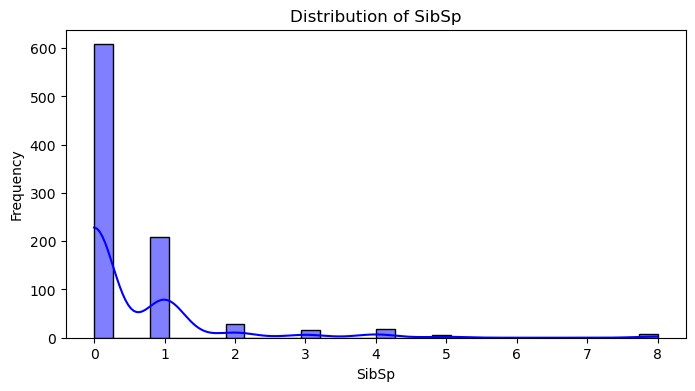

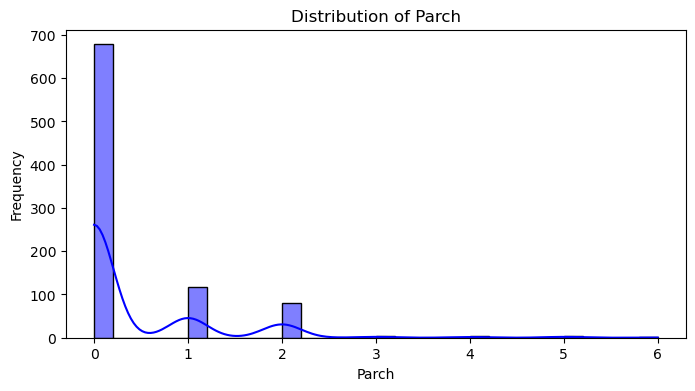

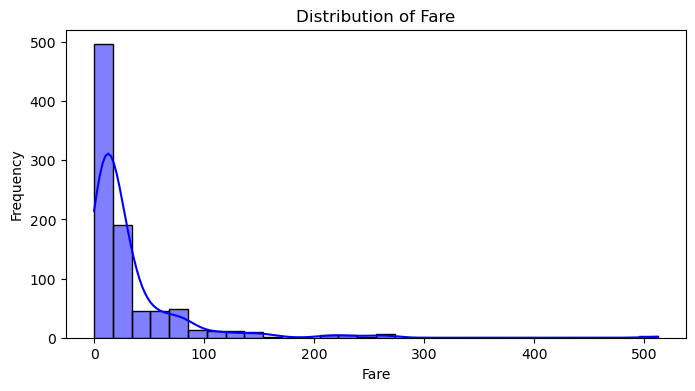

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[feature].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

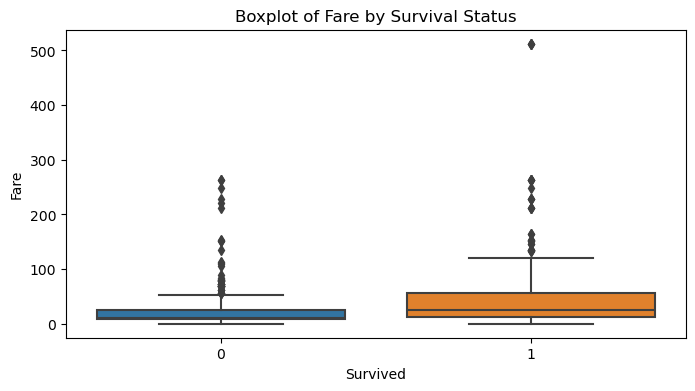

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Boxplot of Fare by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

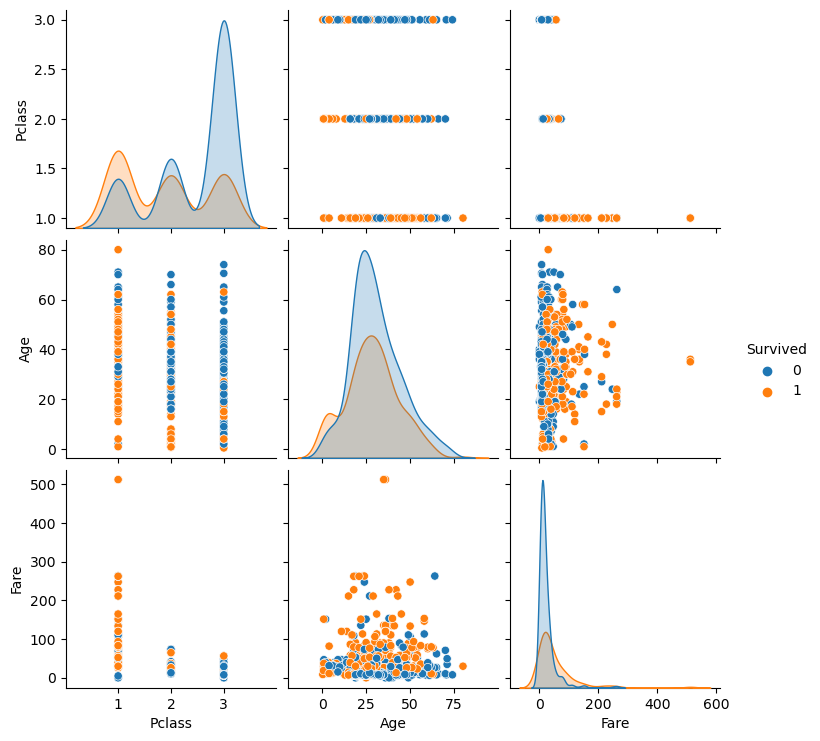

In [10]:
selected_features = ['Survived', 'Pclass', 'Age', 'Fare']
sns.pairplot(train_df[selected_features].dropna(), hue='Survived', diag_kind='kde')
plt.show()

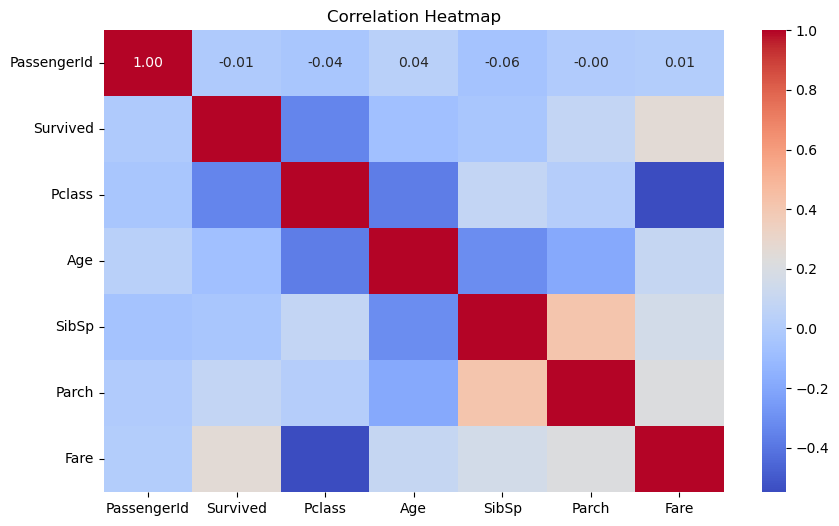

In [11]:
plt.figure(figsize=(10, 6))
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

train_df[numerical_features] = numerical_imputer.fit_transform(train_df[numerical_features])
train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])

In [15]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
encoded_data = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

In [17]:
train_df.head(3)

PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   

   Parch            Ticket     Fare    Cabin Embarked  
0    0.0         A/5 21171   7.2500  B96 B98        S  
1    0.0          PC 17599  71.2833      C85        C  
2    0.0  STON/O2. 3101282   7.9250  B96 B98        S

In [18]:
print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Features: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [19]:
X = encoded_data.drop('Survived', axis=1)
y = encoded_data['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=10, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10, random_state=42)

In [22]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [23]:
print(y_pred,y_pred_proba)

[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.] [0.31717914 0.31097344 0.34310319 0.53022637 0.44216417 0.59159209
 0.3176339  0.43311407 0.40654082 0.45921039 0.43632907 0.22351469
 0.36308184 0.31683768 0.29587606 0.47986038 0.37236891 0.29833202
 0.31653907 0.37095927 0.3511767  0.34495304 0.38829976 0.35672008
 0.32464084 0.47622744 0.33765636 0.30571896 0.56464967 0.30502286
 0.34681397 0.37271276 0.36437353 0.32046533 0.39424727 0.33546224
 0.43992386 0.32340649 0.36122934 0.29311395 0.61310

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [25]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [26]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")


Model Evaluation Metrics:
Accuracy: 0.64
Precision: 0.69
Recall: 0.24
F1 Score: 0.36
ROC-AUC Score: 0.77


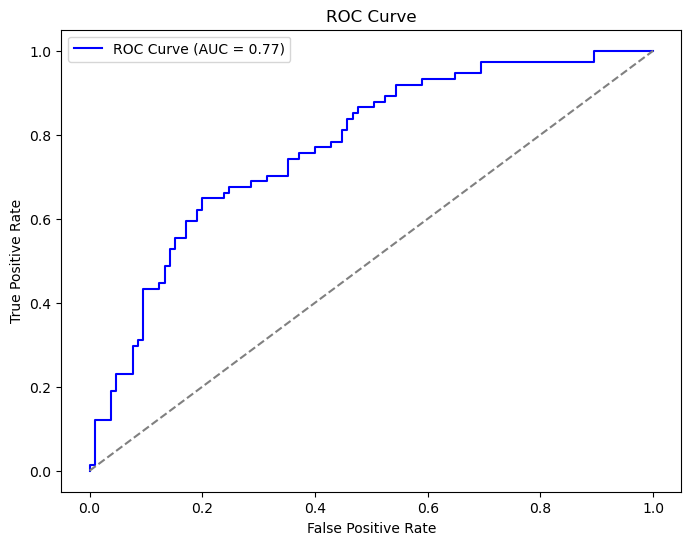

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [28]:
coefficients = model.coef_[0]  # Extracting the coefficients
features = X_train.columns

In [29]:
import numpy as np
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Exp(Coefficient)': np.exp(coefficients)  # Exp to interpret as odds ratios
})
print(coef_df)

          Feature  Coefficient  Exp(Coefficient)
0     PassengerId    -0.000260          0.999740
1          Pclass    -0.003519          0.996487
2             Age    -0.026460          0.973887
3           SibSp    -0.001502          0.998499
4           Parch    -0.000090          0.999910
...           ...          ...               ...
1720     Cabin_F4     0.000028          1.000028
1721     Cabin_G6    -0.000008          0.999992
1722      Cabin_T    -0.000012          0.999988
1723   Embarked_Q    -0.000033          0.999967
1724   Embarked_S    -0.000998          0.999002

[1725 rows x 3 columns]


In [30]:
from sklearn.feature_selection import RFE

In [31]:
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
selector = selector.fit(X_train, y_train)

In [32]:
ranking = selector.ranking_

In [33]:
rfe_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print(rfe_features)

                                    Feature  Ranking
1724                             Embarked_S        1
1                                    Pclass        1
3                                     SibSp        1
1623                          Cabin_B96 B98        1
896                                Sex_male        1
...                                     ...      ...
739            Name_Serepeca, Miss. Augusta     1717
1522                     Ticket_SC/AH 29037     1718
861              Name_Wheadon, Mr. Edward H     1719
619   Name_Olsson, Mr. Nils Johan Goransson     1720
620        Name_Olsvigen, Mr. Thor Anderson     1721

[1725 rows x 2 columns]


In [34]:
import streamlit as st
import pickle
import numpy as np

In [36]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [37]:
st.title('Titanic Survival Prediction')
pclass = st.selectbox('Pclass (Passenger Class)', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.number_input('Age', min_value=0, max_value=100, value=30)
sibsp = st.number_input('Siblings/Spouses Aboard', min_value=0, max_value=10, value=0)
parch = st.number_input('Parents/Children Aboard', min_value=0, max_value=10, value=0)
fare = st.number_input('Fare', min_value=0, max_value=500, value=50)

2024-12-25 11:06:15.994 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [38]:
sex = 1 if sex == 'female' else 0

In [39]:
features = np.array([pclass, sex, age, sibsp, parch, fare]).reshape(1, -1)
if st.button('Predict Survival Probability'):
    prediction = model.predict_proba(features)[0][1]  # Predict the probability of survival
    st.write(f'Survival Probability: {prediction:.2f}')

In [44]:
!pip show streamlit

Name: streamlit
Version: 1.30.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, importlib-metadata, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, python-dateutil, requests, rich, tenacity, toml, tornado, typing-extensions, tzlocal, validators, watchdog
Required-by: 


In [45]:
!pip install streamlit
!streamlit run app.py

Defaulting to user installation because normal site-packages is not writeable


Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Scripts\streamlit-script.py", line 6, in <module>
    from streamlit.cli import main
ModuleNotFoundError: No module named 'streamlit.cli'
